# Task 1: Counting the Number of Jets

In [59]:
import h5py
import os
import pandas as pd

In [60]:
os.chdir('C:\\Users\\anrun\\Jet Tagging\\Step1')
f = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z', 'r')

In [61]:
treeArray = f['t_allpar_new'][()]

In [62]:
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_undef']

In [63]:
labels_df = pd.DataFrame(treeArray,columns=labels)

In [64]:
labels_df

,j_q,j_g,j_w,j_z,j_t,j_undef
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
5119904,0,1,0,0,0,0
5119905,0,0,1,0,0,0
5119906,0,0,0,1,0,0
5119907,0,1,0,0,0,0


There are 5119909 jets in total

# Task2: Study High Level features


In [151]:
import matplotlib.pyplot as plt
import numpy as np

In [112]:

features = ['j_mass_mmdt', 'j_pt', 'j_eta', 'j_zlogz', 'j_multiplicity', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 
      'j_d2_b1_mmdt','j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 
      'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 
      'j_n2_b1_mmdt', 'j_n2_b2_mmdt']
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_undef']

In [113]:
features_labels_df = pd.DataFrame(treeArray,columns = features + labels)

In [118]:
def one_Dee_plot(feature):
    plt.clf
    name = [feature] + labels
    featLabsval = features_labels_df[name].values
    
    quark = []
    gluon = []
    w= []
    z= []
    top = []
    
    for x in featLabsval:
        if x[1] == 1:
            quark.append(x[0])
        if x[2] == 1:
            gluon.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            top.append(x[0])
            
    plt.hist(gluon,50,histtype='step',density = True, label = 'gluon',color = 'blue')
    plt.hist(quark,50,histtype='step',density = True, label = 'quark',color = 'red')
    plt.hist(w,50,histtype='step',density = True, label = 'W',color = 'black')
    plt.hist(z,50,histtype='step',density = True, label = 'Z',color = 'green')
    plt.hist(top,50,histtype='step',density = True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob. Density (a.u.)')
    plt.legend()
    plt.show()

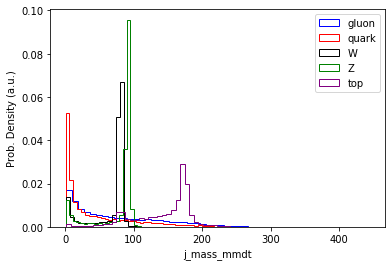

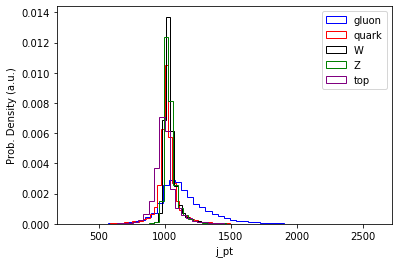

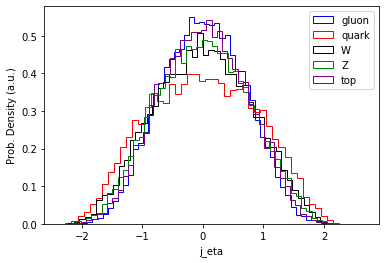

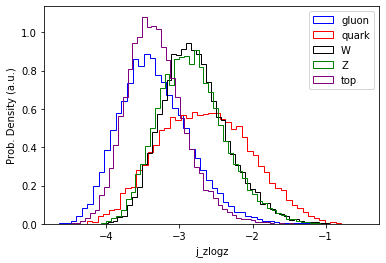

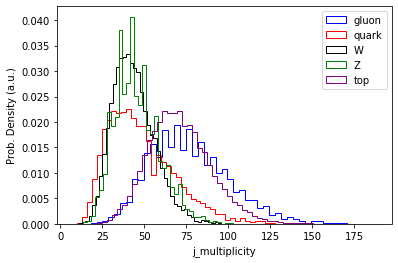

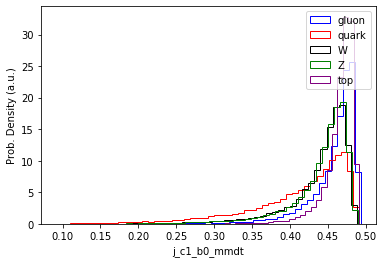

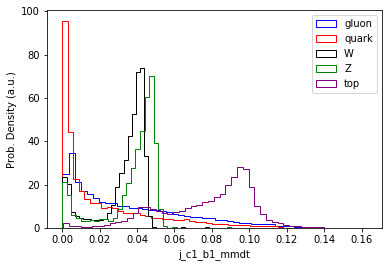

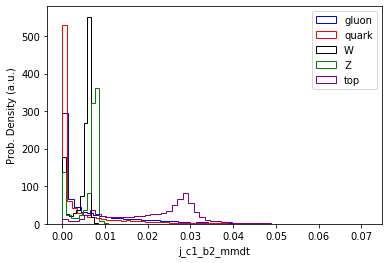

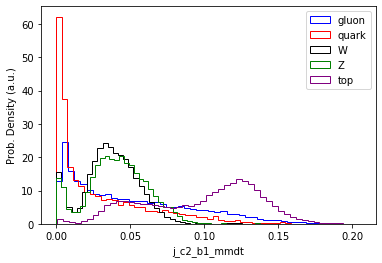

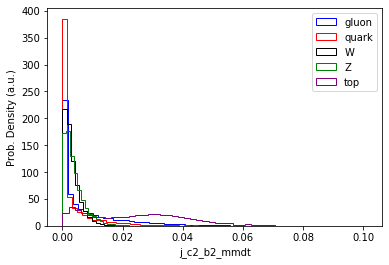

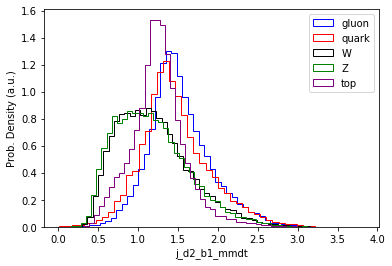

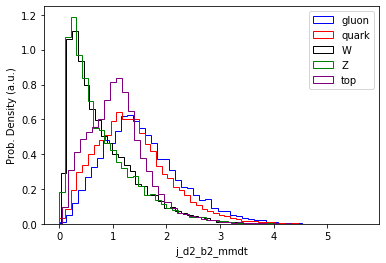

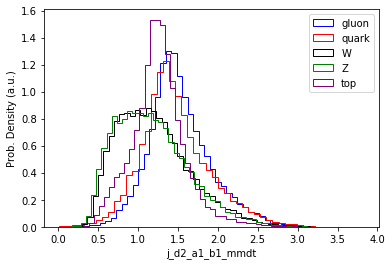

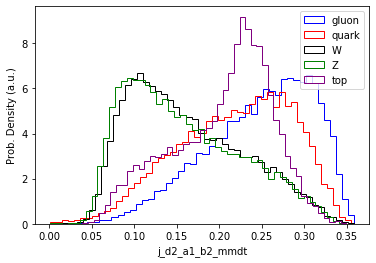

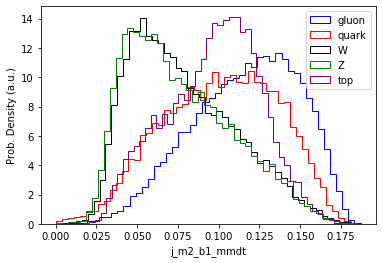

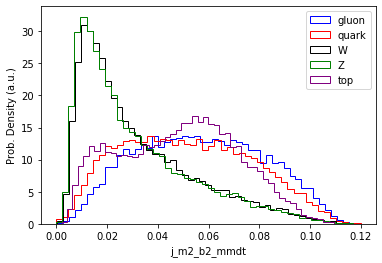

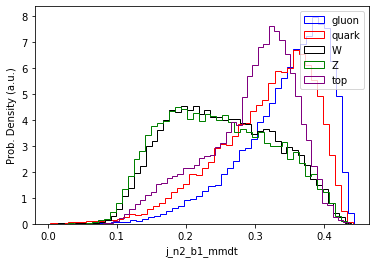

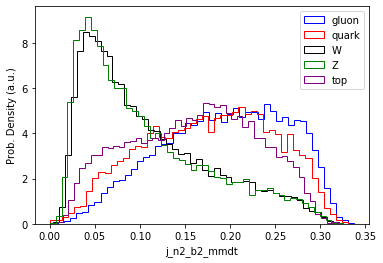

In [119]:
for y in features:
    one_Dee_plot(y)

# Task 3: Study Low Level features


## 1. Draw 1D Distributions

In [163]:
low_feat = ['j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_pdgid', 
            'j1_erel', 'j1_pt', 'j1_ptrel', 'j1_eta', 'j1_etarel', 
             'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 
            'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 
             'j1_e1mcosthetarel']
low_feat_df = pd.DataFrame(treeArray, columns = low_feat + labels)

In [127]:
def low_1D(feature):
    plt.clf
    name = [feature] + labels
    featLabsval = low_feat_df[name].values
    
    quark = []
    gluon = []
    w= []
    z= []
    top = []
    
    for x in featLabsval:
        if x[1] == 1:
            quark.append(x[0])
        if x[2] == 1:
            gluon.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            top.append(x[0])
            
    plt.hist(gluon,50,histtype='step',density = True, log = True, label = 'gluon',color = 'blue')
    plt.hist(quark,50,histtype='step',density = True, log = True, label = 'quark',color = 'red')
    plt.hist(w,50,histtype='step',density = True, log = True, label = 'W',color = 'black')
    plt.hist(z,50,histtype='step',density = True, log = True, label = 'Z',color = 'green')
    plt.hist(top,50,histtype='step',density = True, log = True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob. Density (a.u.)')
    plt.legend()
    plt.show()

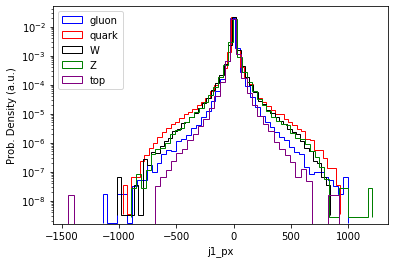

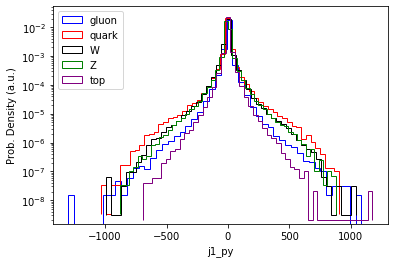

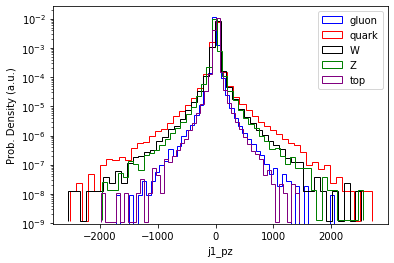

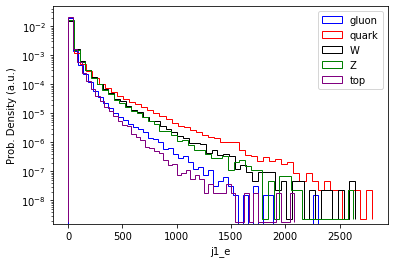

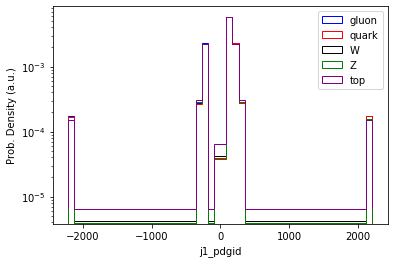

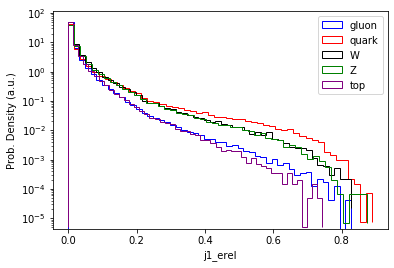

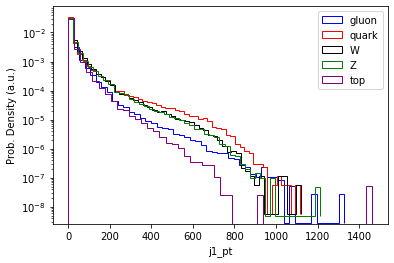

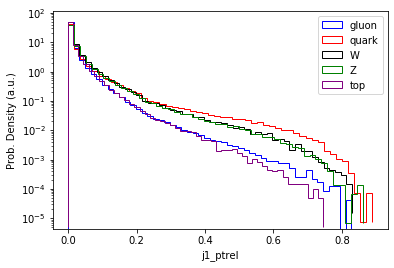

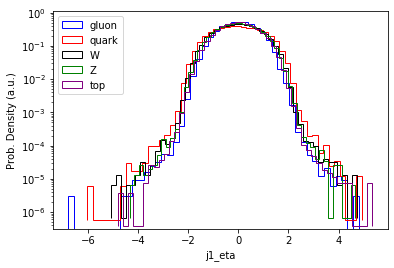

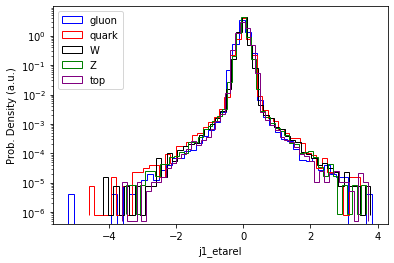

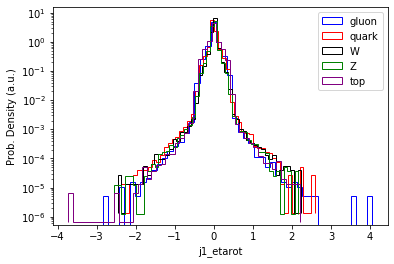

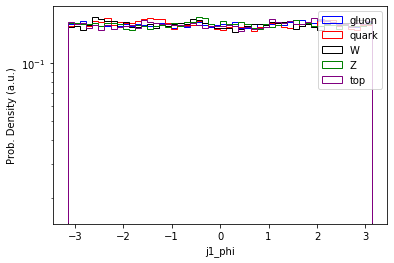

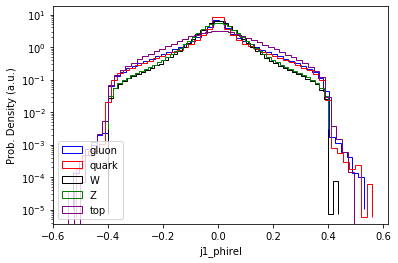

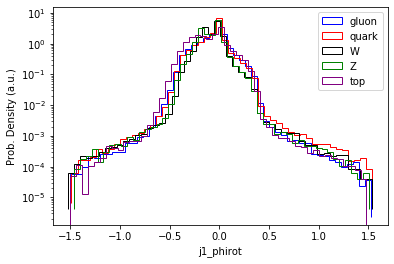

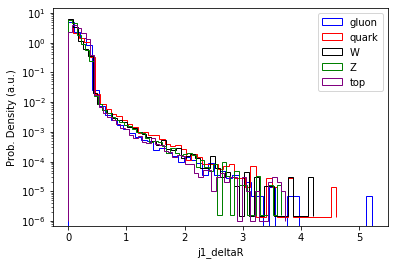

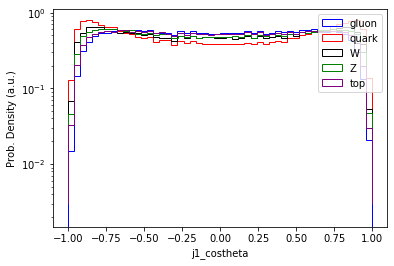

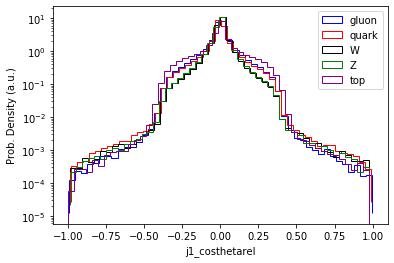

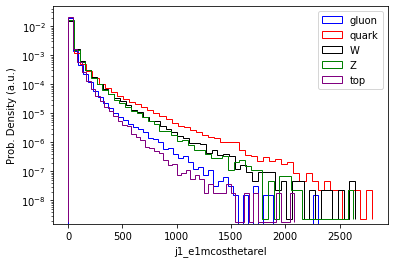

In [128]:
for y in low_feat:
    low_1D(y)

## 2. Draw 2D Distributions


### a. ((jet_etarot, j1_phirot) weighted by j1_ptrel

In [160]:
from matplotlib.colors import LogNorm

In [166]:
labels_noUndef = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t']

In [164]:
def two_Dee_plot_phirot(feature):
    plt.clf()
    plt.hist2d(x = low_feat_df[low_feat_df[feature] == 1].j1_etarot,
        y = low_feat_df[low_feat_df[feature] == 1].j1_phirot,
        weights = low_feat_df[low_feat_df[feature] == 1].j1_ptrel,
        bins = 50, norm = LogNorm())
    
    plt.colorbar()
    plt.title( feature + ' jet weighted by j1_ptrel')
    plt.xlabel('j1_etarot')
    plt.ylabel('j1_phirot')
    plt.show()

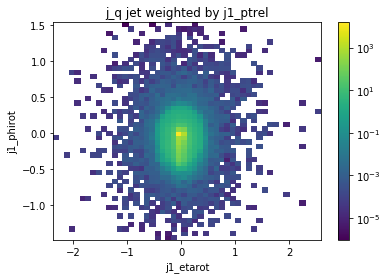

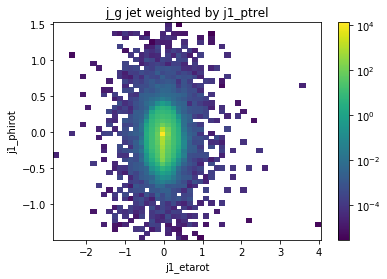

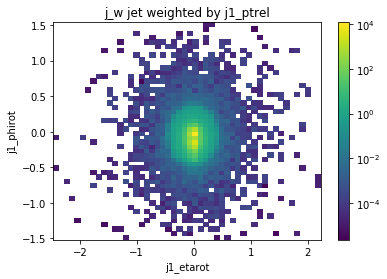

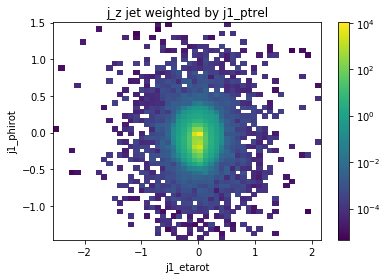

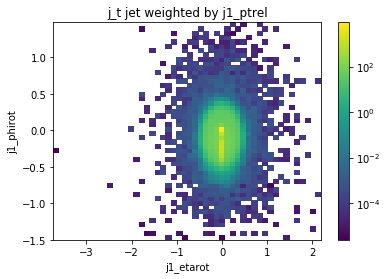

In [167]:
for x in labels_noUndef:
    two_Dee_plot_phirot(x)

### b. (jet_eta, j1_phi) weighted by j1_ptrel

In [168]:
def two_Dee_plot_phi(feature):
    plt.clf()
    plt.hist2d(x = low_feat_df[low_feat_df[feature] == 1].j1_eta,
        y = low_feat_df[low_feat_df[feature] == 1].j1_phi,
        weights = low_feat_df[low_feat_df[feature] == 1].j1_ptrel,
        bins = 50, norm = LogNorm())
    
    plt.colorbar()
    plt.title( feature + ' jet weighted by j1_ptrel')
    plt.xlabel('j1_etarot')
    plt.ylabel('j1_phirot')
    plt.show()

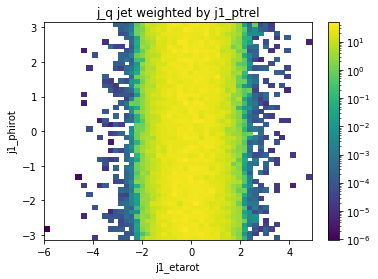

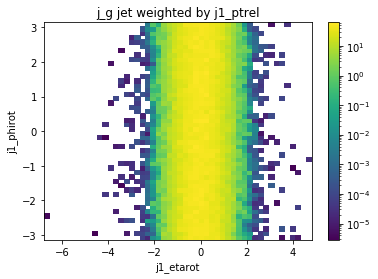

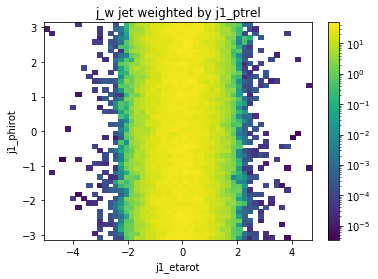

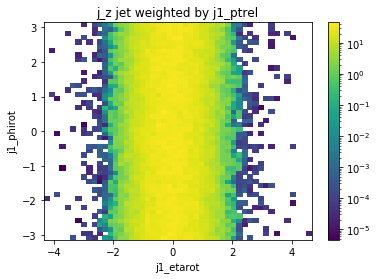

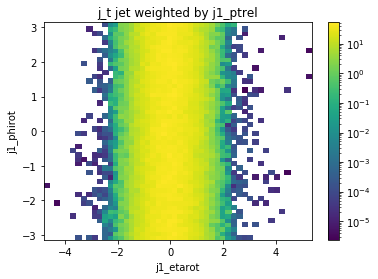

In [169]:
for x in labels_noUndef:
    two_Dee_plot_phi(x)